In [1]:
import zipfile

from tensorflow.python.layers.convolutional import Conv2D

#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
#zip_ref.extractall('10_food_classes_all_data')
#zip_ref.close()

In [2]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'")

There are 4 directories and 0 files in '10_food_classes_all_data'
There are 2 directories and 0 files in '10_food_classes_all_data\10_food_classes_all_data'
There are 10 directories and 10 files in '10_food_classes_all_data\10_food_classes_all_data\test'
There are 0 directories and 250 files in '10_food_classes_all_data\10_food_classes_all_data\test\chicken_curry'
There are 0 directories and 250 files in '10_food_classes_all_data\10_food_classes_all_data\test\chicken_wings'
There are 0 directories and 250 files in '10_food_classes_all_data\10_food_classes_all_data\test\fried_rice'
There are 0 directories and 250 files in '10_food_classes_all_data\10_food_classes_all_data\test\grilled_salmon'
There are 0 directories and 250 files in '10_food_classes_all_data\10_food_classes_all_data\test\hamburger'
There are 0 directories and 250 files in '10_food_classes_all_data\10_food_classes_all_data\test\ice_cream'
There are 0 directories and 250 files in '10_food_classes_all_data\10_food_classes_

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np. array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 509, 3)


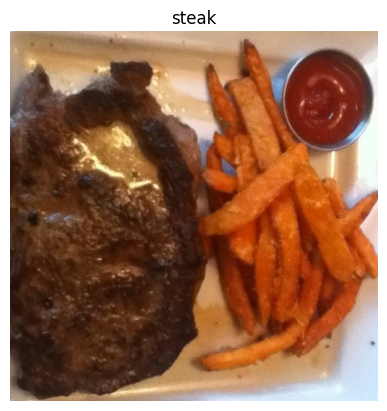

In [5]:
import random

from utils import view_random_image

img  = view_random_image(target_dir=train_dir, target_class = random.choice(class_names))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [7]:
images, labels = next(iter(train_data))
print(f"Image batch shape: {images.shape}")
print(f"Label batch shape: {labels.shape}")


Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 10)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_9.summary()

# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 109s 452ms/step - accuracy: 0.1856 - loss: 2.2076 - val_accuracy: 0.3064 - val_loss: 1.9446
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 74s 313ms/step - accuracy: 0.3504 - loss: 1.8827 - val_accuracy: 0.3392 - val_loss: 1.8809
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 345ms/step - accuracy: 0.4266 - loss: 1.6685 - val_accuracy: 0.3328 - val_loss: 1.9988
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 62s 263ms/step - accuracy: 0.6295 - loss: 1.1468 - val_accuracy: 0.3076 - val_loss: 2.1995
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 71s 304ms/step - accuracy: 0.8596 - loss: 0.4624 - val_accuracy: 0.2920 - val_loss: 3.0419


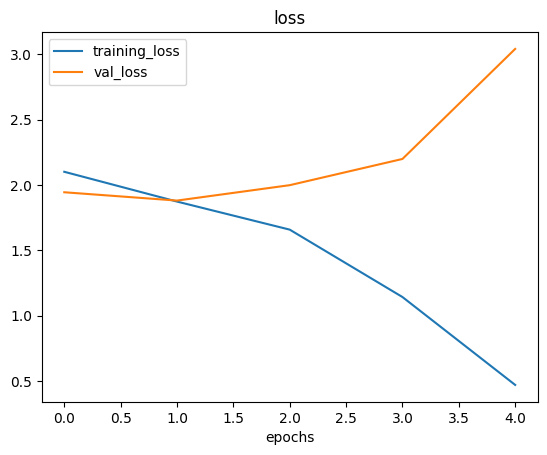

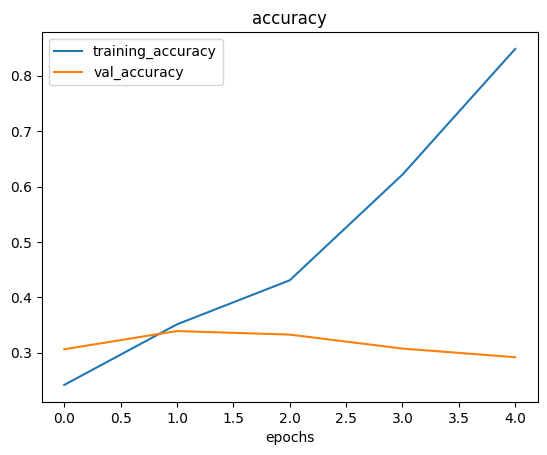

In [9]:
from utils import plot_loss_curves

plot_loss_curves(history_9)

In [10]:
model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.2813 - loss: 3.0643


[3.041877508163452, 0.2919999957084656]

In [11]:
# REDUCE OVERFITTING

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9a = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9a.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_9a.summary()

# Fit the model
history_9a = model_9a.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 195ms/step - accuracy: 0.1188 - loss: 2.5009 - val_accuracy: 0.2108 - val_loss: 2.1278
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 50s 212ms/step - accuracy: 0.2907 - loss: 2.0085 - val_accuracy: 0.3428 - val_loss: 1.8836
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 226ms/step - accuracy: 0.4646 - loss: 1.6220 - val_accuracy: 0.3168 - val_loss: 1.9800
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 51s 218ms/step - accuracy: 0.6336 - loss: 1.1623 - val_accuracy: 0.3228 - val_loss: 2.0391
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 227ms/step - accuracy: 0.8266 - loss: 0.6630 - val_accuracy: 0.3244 - val_loss: 2.3255


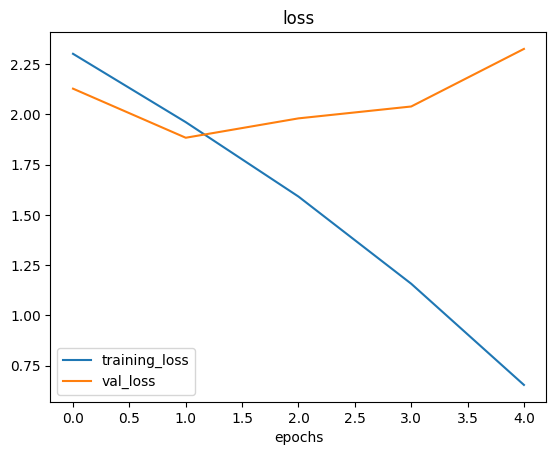

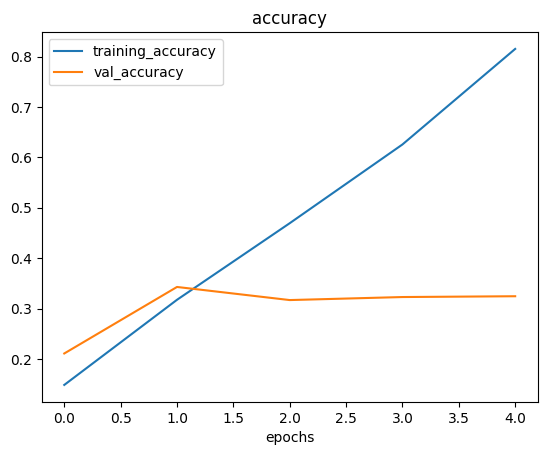

In [13]:
from utils import plot_loss_curves

plot_loss_curves(history_9a)

In [14]:
#Reduce overfitting:  data augmentation

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_10.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_10.summary()

# Fit the model
history_10 = model_10.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 330ms/step - accuracy: 0.1544 - loss: 2.3198 - val_accuracy: 0.2708 - val_loss: 2.0096
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 72s 304ms/step - accuracy: 0.3311 - loss: 1.9081 - val_accuracy: 0.3080 - val_loss: 1.9572
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 72s 307ms/step - accuracy: 0.4660 - loss: 1.5817 - val_accuracy: 0.2944 - val_loss: 2.0533
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 278ms/step - accuracy: 0.7014 - loss: 0.9414 - val_accuracy: 0.2744 - val_loss: 2.6226
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 73s 309ms/step - accuracy: 0.9069 - loss: 0.3324 - val_accuracy: 0.2588 - val_loss: 3.6529


In [16]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)

train_data_augmented =  train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 7500 images belonging to 10 classes.


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 334ms/step - accuracy: 0.1352 - loss: 2.2712 - val_accuracy: 0.2448 - val_loss: 2.0932
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 78s 331ms/step - accuracy: 0.2735 - loss: 2.0609 - val_accuracy: 0.3176 - val_loss: 1.9322
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 357ms/step - accuracy: 0.4060 - loss: 1.7467 - val_accuracy: 0.3636 - val_loss: 1.8516
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 338ms/step - accuracy: 0.6521 - loss: 1.0793 - val_accuracy: 0.2756 - val_loss: 2.3487
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 73s 310ms/step - accuracy: 0.8437 - loss: 0.5237 - val_accuracy: 0.3072 - val_loss: 3.0351


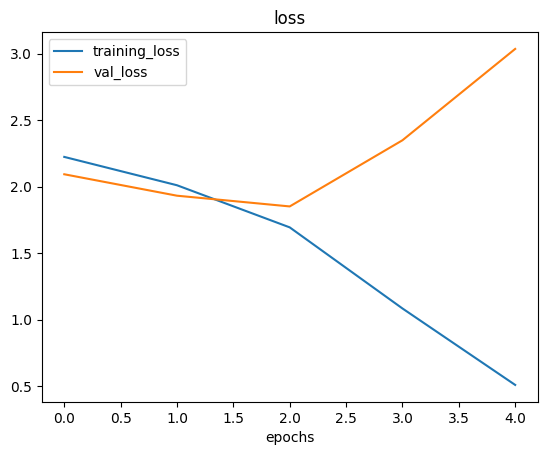

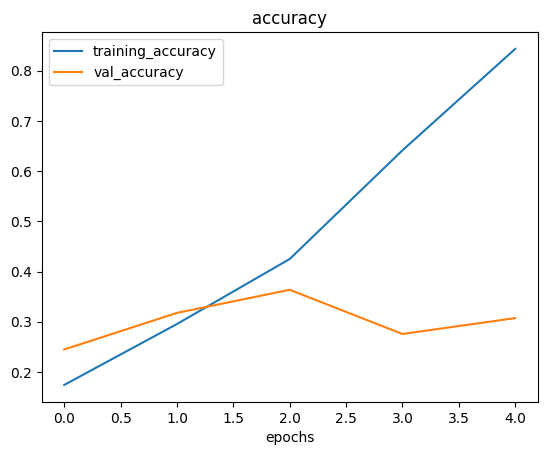

In [18]:
model_10b = tf.keras.models.clone_model(model_9)

model_10b.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

history_10b = model_10b.fit(train_data, 
                            epochs=5, 
                            steps_per_epoch=len(train_data_augmented), 
                            validation_data=test_data,
                            validation_steps=len(test_data))

from utils import plot_loss_curves
plot_loss_curves(history_10b)

In [21]:
model_10b.save('save_trained_model_10b.keras')